### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [9]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [16]:
# Set file paths
amd_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/AMD.csv")
hd_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/HD.csv")
intc_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/INTC.csv")
jnj_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/JNJ.csv")
mu_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/MU.csv")
nvda_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/NVDA.csv")
tsm_data = Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/02-Stu_Correlation/Resources/TSM.csv")

amd = pd.read_csv(amd_data, index_col="date")
hd = pd.read_csv(hd_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")
amd.head(2)


,AMD
date,
5/14/19,27.32
5/13/19,26.24


### Combine the DataFrames

In [17]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
stocks = pd.concat([amd, hd, intc, jnj, mu, nvda, tsm, amd], axis="columns", join="inner")
stocks

,AMD,HD,INTC,JNJ,MU,NVDA,TSM,AMD
date,,,,,,,,
5/14/19,27.32,191.62,45.17,66.9700,38.51,162.04,41.9700,27.32
5/13/19,26.24,190.34,44.76,66.4900,37.38,158.45,40.9900,26.24
5/10/19,27.96,194.58,46.20,67.2200,38.94,168.82,42.8300,27.96
5/9/19,27.21,194.58,46.62,66.0400,39.27,170.19,43.2500,27.21
5/8/19,27.09,195.17,49.24,66.0200,39.75,173.92,43.7000,27.09
...,...,...,...,...,...,...,...,...
5/20/09,4.50,23.83,15.58,12.3299,4.80,9.73,10.4677,4.50
5/19/09,4.39,24.63,15.65,12.3875,4.85,9.45,10.5871,4.39
5/18/09,4.14,26.02,15.52,12.1925,4.68,9.27,10.4975,4.14


### Calculate Daily Returns

In [18]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_return = stocks.pct_change()
daily_return

,AMD,HD,INTC,JNJ,MU,NVDA,TSM,AMD
date,,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.039531,-0.006680,-0.009077,-0.007167,-0.029343,-0.022155,-0.023350,-0.039531
5/10/19,0.065549,0.022276,0.032172,0.010979,0.041734,0.065447,0.044889,0.065549
5/9/19,-0.026824,0.000000,0.009091,-0.017554,0.008475,0.008115,0.009806,-0.026824
5/8/19,-0.004410,0.003032,0.056199,-0.000303,0.012223,0.021917,0.010405,-0.004410
...,...,...,...,...,...,...,...,...
5/20/09,0.036866,0.041066,0.026350,0.014214,0.048035,0.006205,0.010571,0.036866
5/19/09,-0.024444,0.033571,0.004493,0.004672,0.010417,-0.028777,0.011407,-0.024444
5/18/09,-0.056948,0.056435,-0.008307,-0.015742,-0.035052,-0.019048,-0.008463,-0.056948


### Calculate Correlation

In [21]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_return.corr()
correlation

,AMD,HD,INTC,JNJ,MU,NVDA,TSM,AMD
AMD,1.000000,0.294653,0.385877,0.254498,0.438329,0.471212,0.352482,1.000000
HD,0.294653,1.000000,0.429047,0.329386,0.375932,0.360918,0.393293,0.294653
INTC,0.385877,0.429047,1.000000,0.318188,0.511066,0.483262,0.500741,0.385877
JNJ,0.254498,0.329386,0.318188,1.000000,0.337060,0.257717,0.317493,0.254498
MU,0.438329,0.375932,0.511066,0.337060,1.000000,0.517198,0.477247,0.438329
NVDA,0.471212,0.360918,0.483262,0.257717,0.517198,1.000000,0.472496,0.471212
TSM,0.352482,0.393293,0.500741,0.317493,0.477247,0.472496,1.000000,0.352482
AMD,1.000000,0.294653,0.385877,0.254498,0.438329,0.471212,0.352482,1.000000


### Plot Correlation

<AxesSubplot:>

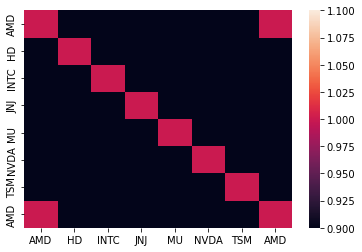

In [22]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=1, vmax=1)

<AxesSubplot:>

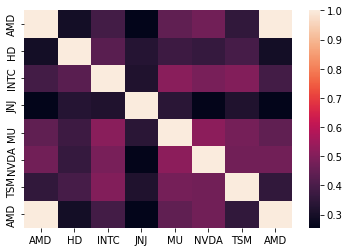

In [23]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?